In [ ]:
#KINTALI SAHIL
#CS20B1114

In [7]:
import cv2
import numpy as np
from skimage.util import random_noise
import matplotlib.pyplot as plt

img = cv2.imread("Lena.png",0)

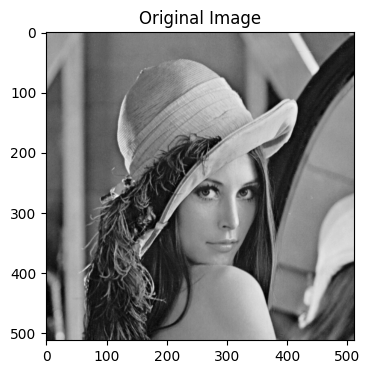

Salt and Pepper Noisy Images


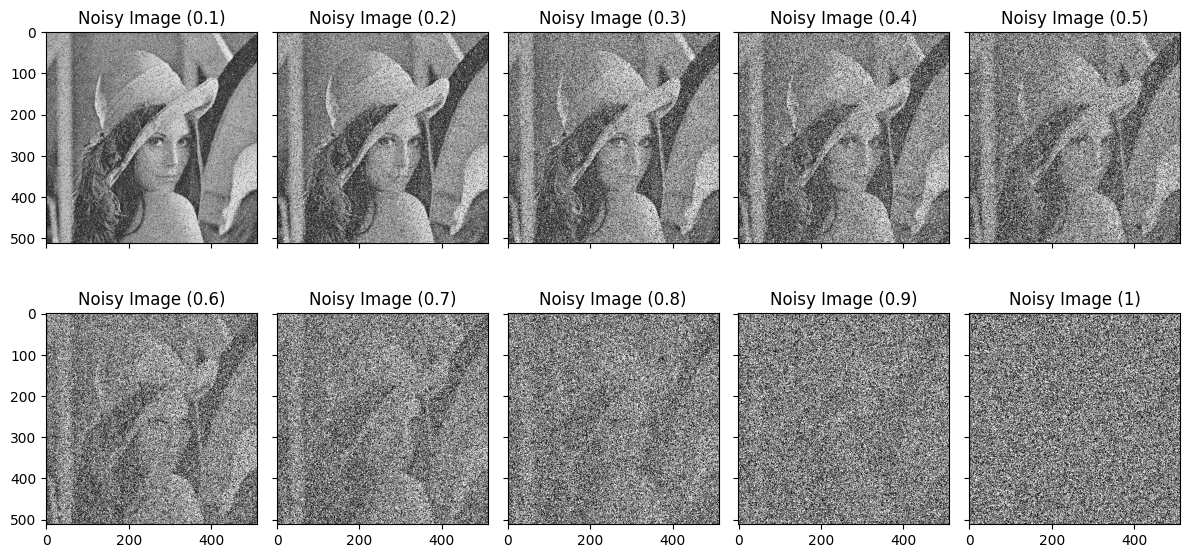

In [8]:
fig = plt.figure(figsize=(4, 4))
plt.imshow(img, cmap='gray')

# Set the title of the plot
plt.title("Original Image")

# Show the plot
plt.show()

quantity = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
print("Salt and Pepper Noisy Images")
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6), sharex=True, sharey=True)
ax = axes.ravel()
Noise_Images=[]
for i in range(len(quantity)):
    noise_img = random_noise(img, mode='s&p', amount=quantity[i])
    noise_img = np.array(255 * noise_img, dtype='uint8')
    Noise_Images.append(noise_img)
    ax[i].imshow(noise_img, cmap=plt.cm.gray)
    ax[i].set_title(f"Noisy Image ({quantity[i]})")

plt.tight_layout()
plt.show()

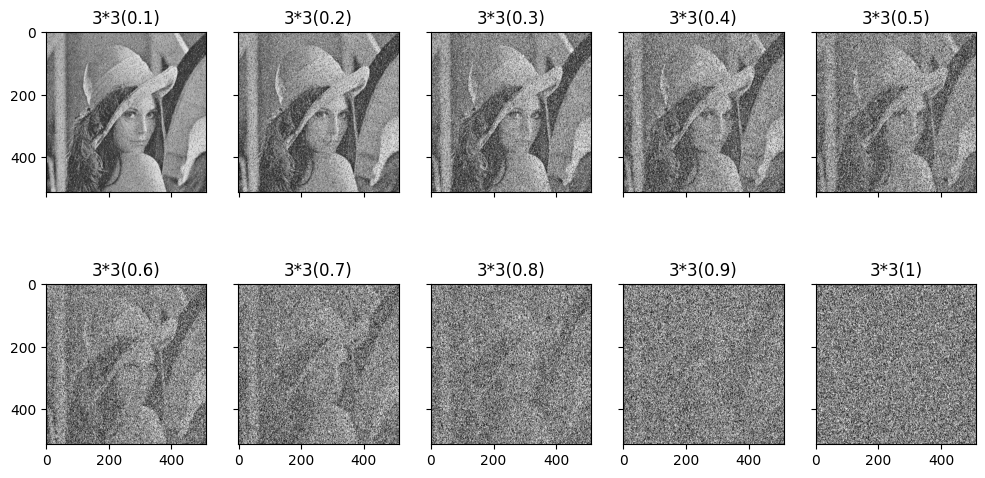

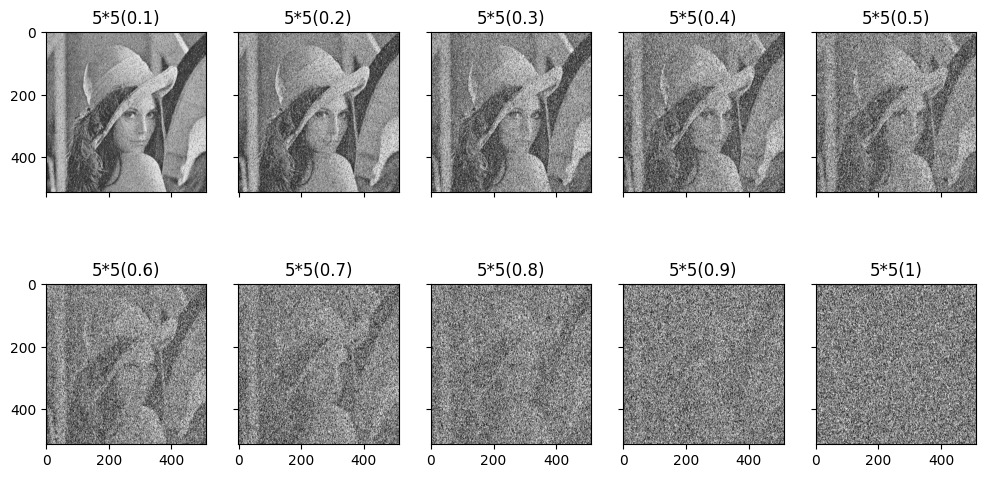

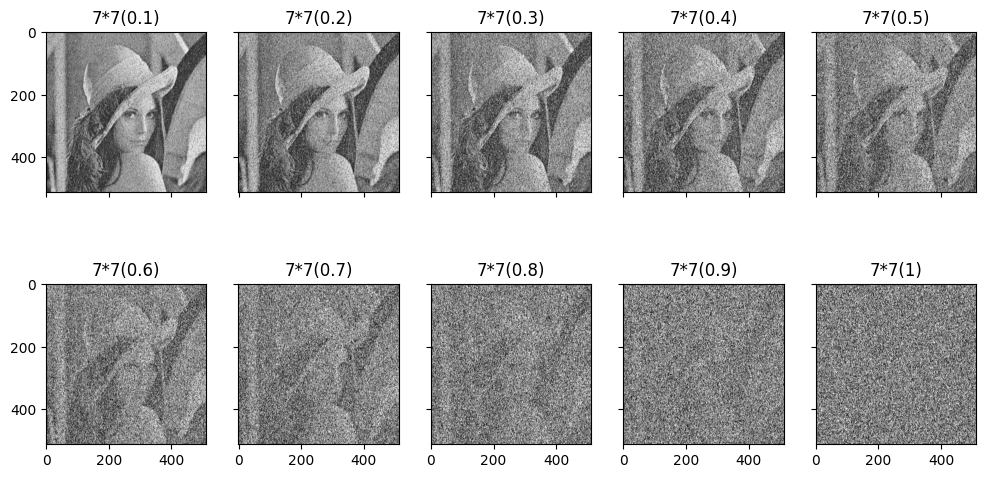

In [9]:
# Create a 3 x 3 Gaussian filter using OpenCV
def Corelation_builtin(size):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6), sharex=True, sharey=True)
    ax = axes.ravel()
    kernel = cv2.getGaussianKernel(size, 1)  #size =filtersize and standarddeviation =1 
    
    # Correlate the noisy image with the Gaussian filter using OpenCV's filter2D function
    for i in range(len(Noise_Images)):
        filtered_img = cv2.filter2D(Noise_Images[i], -1, kernel)
        ax[i].imshow(filtered_img, cmap=plt.cm.gray)
        ax[i].set_title(f"{size}*{size}({quantity[i]})")
        
sizes=[3,5,7]

for Size in sizes:
    Corelation_builtin(Size)        
    
cv2.waitKey(0)
cv2.destroyAllWindows()

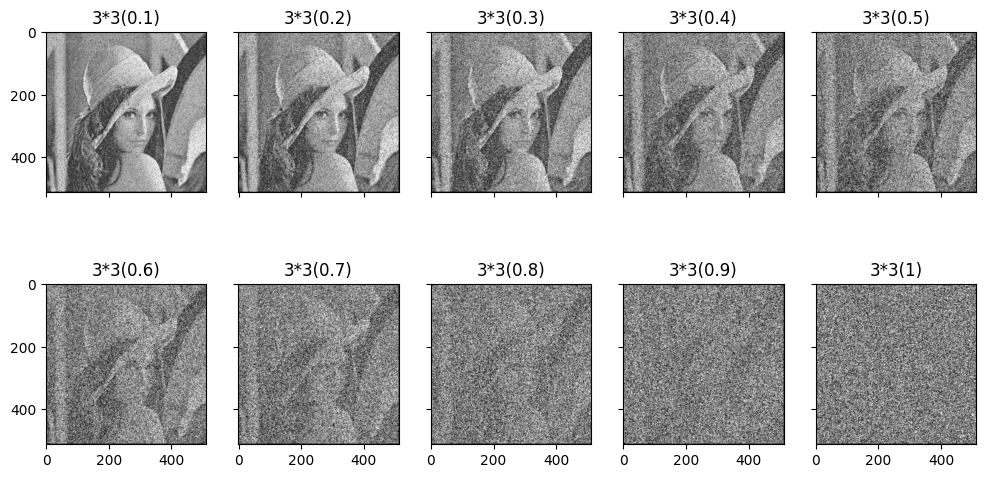

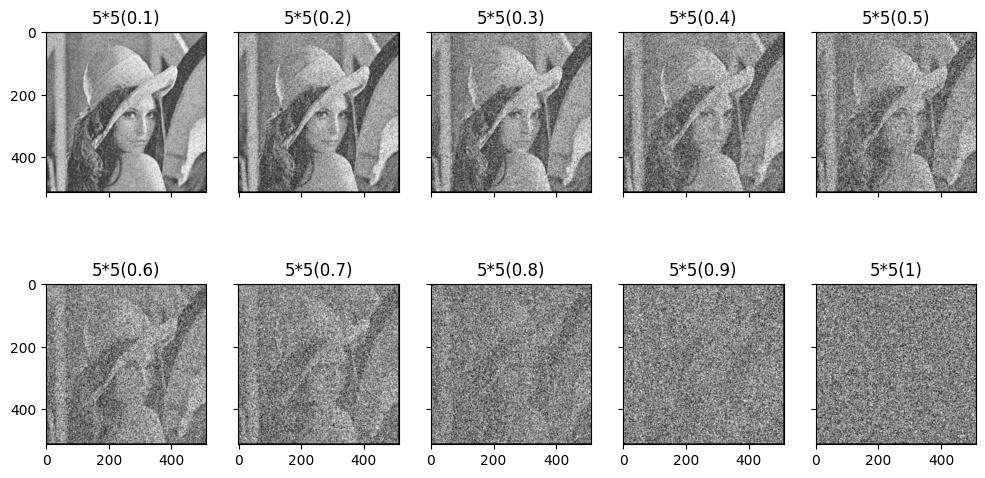

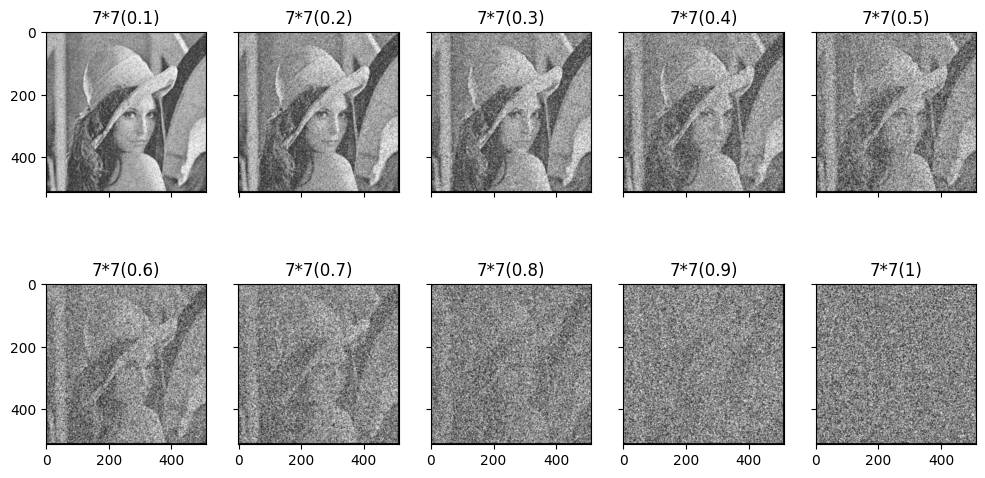

In [5]:
#User Defined Function
def Corelation(size):
    sigma=1;
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6), sharex=True, sharey=True)
    ax = axes.ravel()
    
    for x in range(len(Noise_Images)):
        k = (size - 1) // 2  # half of kernel size
        kernel = np.zeros((size, size))
        for i in range(-k, k+1):
            for j in range(-k, k+1):
                kernel[i+k, j+k] = np.exp(-(i*2 + j2) / (2 * sigma*2))

        # Normalize the kernel to have unit sum
        kernel /= np.sum(kernel)

        # Correlate the filter with the image
        filtered_img = np.zeros_like(Noise_Images[x])
        for i in range(k, Noise_Images[x].shape[0]-k):
            for j in range(k, Noise_Images[x].shape[1]-k):
                filtered_img[i, j] = np.sum(Noise_Images[x][i-k:i+k+1, j-k:j+k+1] * kernel)

        # Display the filtered image
        ax[x].imshow(filtered_img, cmap=plt.cm.gray)
        ax[x].set_title(f"{size}*{size}({quantity[x]})")
sizes=[3,5,7]
for Size in sizes:
    Corelation(Size)
cv2.waitKey(0)
cv2.destroyAllWindows()